# UFC Retirement Age - Data Wrangling<a id='2_Data_wrangling'></a>

## 1. Contents<a id='1_Contents'></a>
* [1 Contents](#_UFC_Retirement_Age_-_Data_Wrangling)
* [2 Data Collection](#_UFC_Retirement_Age_-_Data_Wrangling)
* [3 Data Organization](#_UFC_Retirement_Age_-_Data_Wrangling)
* [4_Data Definition](#_UFC_Retirement_Age_-_Data_Wrangling)
* [5_Data Cleaning](#_UFC_Retirement_Age_-_Data_Wrangling)
 * [5.1 Remove unnecessary columns](#_UFC_Retirement_Age_-_Data_Wrangling)
 * [5.2 Transform DataFrame](#_UFC_Retirement_Age_-_Data_Wrangling)
 * [5.3_Remove_Null_Values](#_UFC_Retirement_Age_-_Data_Wrangling)

## 2. Data Collection<a id='2.2_Introduction'></a>

**Goal: Organize your data to streamline the next steps of your capstone.**

First, all libraries required for this project will be imported.

In [1]:
from kaggle.api.kaggle_api_extended import KaggleApi
import kaggle as kg
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from zipfile import ZipFile

Using the Kaggle API, the necessary dataset is imported as a Pandas DataFrame and previewed.

In [2]:
api = KaggleApi()
api.authenticate()
api.dataset_download_file('mdabbert/ultimate-ufc-dataset', 'ufc-master.csv')
zf = ZipFile('ufc-master.csv.zip')
zf.extractall()
zf.close()
ufc = pd.read_csv('ufc-master.csv')
ufc.head()

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,R_td_attempted_bout,B_td_attempted_bout,R_td_pct_bout,B_td_pct_bout,R_sub_attempts_bout,B_sub_attempts_bout,R_pass_bout,B_pass_bout,R_rev_bout,B_rev_bout
0,Holly Holm,Irene Aldana,-125,103,80.000000,103.000000,10/3/2020,"Abu Dhabi, Abu Dhabi, United Arab Emirates",United Arab Emirates,Red,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Yorgan De Castro,Carlos Felipe,-265,205,37.735849,205.000000,10/3/2020,"Abu Dhabi, Abu Dhabi, United Arab Emirates",United Arab Emirates,Blue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Germaine de Randamie,Julianna Pena,-150,122,66.666667,122.000000,10/3/2020,"Abu Dhabi, Abu Dhabi, United Arab Emirates",United Arab Emirates,Red,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Kyler Phillips,Cameron Else,-480,342,20.833333,342.000000,10/3/2020,"Abu Dhabi, Abu Dhabi, United Arab Emirates",United Arab Emirates,Red,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Dequan Townsend,Dusko Todorovic,245,-335,245.000000,29.850746,10/3/2020,"Abu Dhabi, Abu Dhabi, United Arab Emirates",United Arab Emirates,Blue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
ufc.shape

(4408, 137)

## 3. Data Organization<a id='2.2_Introduction'></a>

**Goal: Create a file structure and add your work to the GitHub repository you’ve created for this project.**

This notebook, along with the rest of the notebooks for this capstone project, will be uploaded to GitHub in a proper repository.

## 4. Data Definition<a id='2.2_Introduction'></a>

**Goal: Gain an understanding of your data features to inform the next steps of your project.**

To begin cleaning up my data, I will first examine the columns in the dataset.

In [4]:
ufc.dtypes

R_fighter               object
B_fighter               object
R_odds                   int64
B_odds                   int64
R_ev                   float64
                        ...   
B_sub_attempts_bout    float64
R_pass_bout            float64
B_pass_bout            float64
R_rev_bout             float64
B_rev_bout             float64
Length: 137, dtype: object

Since there are a lot of columns, I will check the columns that belong to each data type. Even though I won't be able to examine every single column, hopefully the columns will have the appropriate data type at a glance.

In [5]:
ufc.dtypes[ufc.dtypes == object]

R_fighter            object
B_fighter            object
date                 object
location             object
country              object
Winner               object
weight_class         object
gender               object
B_Stance             object
R_Stance             object
better_rank          object
finish               object
finish_details       object
finish_round_time    object
dtype: object

In [6]:
ufc.dtypes[ufc.dtypes == 'float64']

R_ev                    float64
B_ev                    float64
B_avg_SIG_STR_landed    float64
B_avg_SIG_STR_pct       float64
B_avg_SUB_ATT           float64
                         ...   
B_sub_attempts_bout     float64
R_pass_bout             float64
B_pass_bout             float64
R_rev_bout              float64
B_rev_bout              float64
Length: 75, dtype: object

In [7]:
ufc.dtypes[(ufc.dtypes != 'object') & (ufc.dtypes != 'float64')]

R_odds                          int64
B_odds                          int64
title_bout                       bool
no_of_rounds                    int64
B_current_lose_streak           int64
B_current_win_streak            int64
B_draw                          int64
B_longest_win_streak            int64
B_losses                        int64
B_total_rounds_fought           int64
B_total_title_bouts             int64
B_win_by_Decision_Majority      int64
B_win_by_Decision_Split         int64
B_win_by_Decision_Unanimous     int64
B_win_by_KO/TKO                 int64
B_win_by_Submission             int64
B_win_by_TKO_Doctor_Stoppage    int64
B_wins                          int64
B_Weight_lbs                    int64
R_current_lose_streak           int64
R_current_win_streak            int64
R_draw                          int64
R_longest_win_streak            int64
R_losses                        int64
R_total_rounds_fought           int64
R_total_title_bouts             int64
R_win_by_Dec

With all the datatypes accounted for, it looks like each column has the proper datatype for its data. If this is not the case, it can be dealt with later on. Each column has also been properly named. As of now, there are no more major changes that need to be made for this step. 

## 5. Data Cleaning<a id='2.2_Introduction'></a>

**Goal: Clean up the data in order to prepare it for the next steps of your project.**

### 5.1 Remove unnecessary columns

There are several columns in this dataset that will most likely not be needed for this project. Those will first be preserved in a separate DataFrame, then removed from the main one. For example, the location and referee for each fight will likely not be relevant to this analysis. 

In [8]:
del_col_names = ['location']
ufc_del = ufc[del_col_names]
ufc.drop(ufc_del, axis=1, inplace=True)
pd.Series(['Referee', 'location']).isin(ufc.columns).all()

False

### 5.2 Transform DataFrame

Next, it's time to find any Null values and decide whether to drop them or impute them. I begin this task by setting the index for this DataFrame.

In [9]:
ufc = ufc.set_index(['date'], drop=True)

Then, I will check the amount of NaN values in the dataset.

In [10]:
ufc.isnull().sum().sum()

168169

In [11]:
null_rows = ufc.isnull().sum(axis=1)
null_rows = null_rows[null_rows > 0].sort_values(ascending=False)
print('Rows with at least one Null value:', str(null_rows.count()))

Rows with at least one Null value: 4408


In [12]:
null_cols = ufc.isnull().sum(axis=0)
null_cols = null_cols[null_cols > 0].sort_values(ascending=False)
print('Columns with at least one Null value:', str(null_cols.count()))

Columns with at least one Null value: 67


There seem to be a lot of Null values, so inspecing the distribution of Null values may shed some light on this problem.

In [13]:
null_rows.head()

date
11/21/2015    67
11/8/2014     67
8/1/2015      67
9/3/2016      67
6/8/2013      67
dtype: int64

It seems like most of the Null values might have been the result of insufficient information during the earlier days of the UFC, also known as the UFC's "Dark Ages." To verify this, I will plot the distribution of Null values in the DataFrame sorted by date.

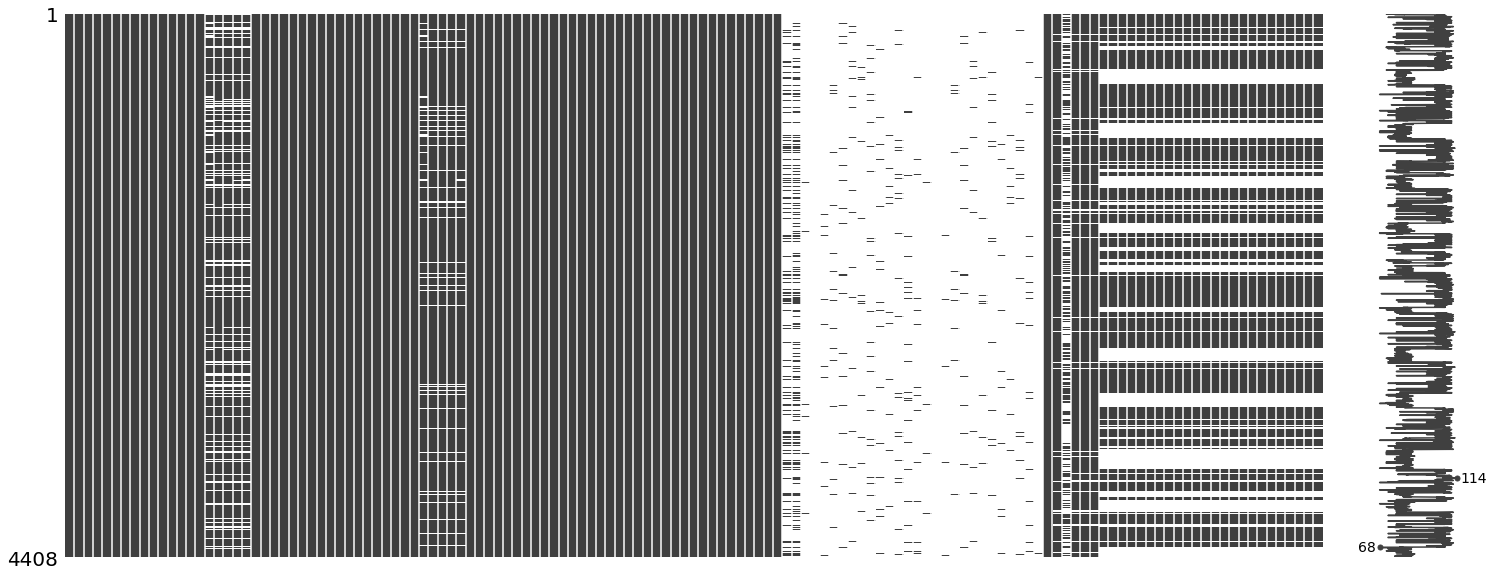

In [14]:
msno.matrix(ufc.sort_values(by='date'))

The Null values seem to be distributed more evenly than I thought they were when sorted by date. However, the Null values are disproportionately distributed between the Red and Blue corner fighters. Since it would make the exploratory analysis simpler, I will transform the DataFrame so that each row corresponds to one fighter instead of one fight. This way, I will have less columns, but more rows. This will also make it easier to remove rows with missing data for one fighter without removing data for the other fighter as well. I will do this by creating 2 DataFrames, one for Red fighters and one for Blue fighters, then merging them.

In [15]:
ufc.drop(columns = [null_cols.head(28).index[n] for n in range(28)], inplace=True)

In [16]:
ufc.columns

Index(['R_fighter', 'B_fighter', 'R_odds', 'B_odds', 'R_ev', 'B_ev', 'country',
       'Winner', 'title_bout', 'weight_class',
       ...
       'R_td_attempted_bout', 'B_td_attempted_bout', 'R_td_pct_bout',
       'B_td_pct_bout', 'R_sub_attempts_bout', 'B_sub_attempts_bout',
       'R_pass_bout', 'B_pass_bout', 'R_rev_bout', 'B_rev_bout'],
      dtype='object', length=107)

In [17]:
red_cols = [col for col in ufc.columns if not col.startswith('B')]
red_fighters = ufc[red_cols]
red_fighters.head()

,R_fighter,R_odds,R_ev,country,Winner,title_bout,weight_class,gender,no_of_rounds,R_current_lose_streak,...,R_sig_str_attempted_bout,R_sig_str_pct_bout,R_tot_str_landed_bout,R_tot_str_attempted_bout,R_td_landed_bout,R_td_attempted_bout,R_td_pct_bout,R_sub_attempts_bout,R_pass_bout,R_rev_bout
date,,,,,,,,,,,,,,,,,,,,,
10/3/2020,Holly Holm,-125,80.000000,United Arab Emirates,Red,False,Women's Bantamweight,FEMALE,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10/3/2020,Yorgan De Castro,-265,37.735849,United Arab Emirates,Blue,False,Heavyweight,MALE,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10/3/2020,Germaine de Randamie,-150,66.666667,United Arab Emirates,Red,False,Women's Bantamweight,FEMALE,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10/3/2020,Kyler Phillips,-480,20.833333,United Arab Emirates,Red,False,Bantamweight,MALE,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10/3/2020,Dequan Townsend,245,245.000000,United Arab Emirates,Blue,False,Middleweight,MALE,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
blue_cols = [col for col in ufc.columns if not col.startswith('R')]
blue_fighters = ufc[blue_cols]
blue_fighters.head()

,B_fighter,B_odds,B_ev,country,Winner,title_bout,weight_class,gender,no_of_rounds,B_current_lose_streak,...,B_sig_str_attempted_bout,B_sig_str_pct_bout,B_tot_str_landed_bout,B_tot_str_attempted_bout,B_td_landed_bout,B_td_attempted_bout,B_td_pct_bout,B_sub_attempts_bout,B_pass_bout,B_rev_bout
date,,,,,,,,,,,,,,,,,,,,,
10/3/2020,Irene Aldana,103,103.000000,United Arab Emirates,Red,False,Women's Bantamweight,FEMALE,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10/3/2020,Carlos Felipe,205,205.000000,United Arab Emirates,Blue,False,Heavyweight,MALE,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10/3/2020,Julianna Pena,122,122.000000,United Arab Emirates,Red,False,Women's Bantamweight,FEMALE,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10/3/2020,Cameron Else,342,342.000000,United Arab Emirates,Red,False,Bantamweight,MALE,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10/3/2020,Dusko Todorovic,-335,29.850746,United Arab Emirates,Blue,False,Middleweight,MALE,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
neutral_cols = [col[2:]  if col.startswith('R') else col for col in red_fighters.columns ]
neutral_cols

['fighter',
 'odds',
 'ev',
 'country',
 'Winner',
 'title_bout',
 'weight_class',
 'gender',
 'no_of_rounds',
 'current_lose_streak',
 'current_win_streak',
 'draw',
 'avg_SIG_STR_landed',
 'avg_SIG_STR_pct',
 'avg_SUB_ATT',
 'avg_TD_landed',
 'avg_TD_pct',
 'longest_win_streak',
 'losses',
 'total_rounds_fought',
 'total_title_bouts',
 'win_by_Decision_Majority',
 'win_by_Decision_Split',
 'win_by_Decision_Unanimous',
 'win_by_KO/TKO',
 'win_by_Submission',
 'win_by_TKO_Doctor_Stoppage',
 'wins',
 'Stance',
 'Height_cms',
 'Reach_cms',
 'Weight_lbs',
 'age',
 'lose_streak_dif',
 'win_streak_dif',
 'longest_win_streak_dif',
 'win_dif',
 'loss_dif',
 'total_round_dif',
 'total_title_bout_dif',
 'ko_dif',
 'sub_dif',
 'height_dif',
 'reach_dif',
 'age_dif',
 'sig_str_dif',
 'avg_sub_att_dif',
 'avg_td_dif',
 'empty_arena',
 'constant_1',
 'better_rank',
 'finish',
 'finish_details',
 'finish_round',
 'finish_round_time',
 'total_fight_time_secs',
 'kd_bout',
 'sig_str_landed_bout',
 'si

I will merge the 2 DataFrames with these neutral columns, but first I have to change the values in the Winner columns. This will help me in my analysis later on.

In [20]:
red_fighters['Winner'] = [winner == 'Red' for winner in red_fighters['Winner']]
red_fighters.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,R_fighter,R_odds,R_ev,country,Winner,title_bout,weight_class,gender,no_of_rounds,R_current_lose_streak,...,R_sig_str_attempted_bout,R_sig_str_pct_bout,R_tot_str_landed_bout,R_tot_str_attempted_bout,R_td_landed_bout,R_td_attempted_bout,R_td_pct_bout,R_sub_attempts_bout,R_pass_bout,R_rev_bout
date,,,,,,,,,,,,,,,,,,,,,
10/3/2020,Holly Holm,-125,80.000000,United Arab Emirates,True,False,Women's Bantamweight,FEMALE,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10/3/2020,Yorgan De Castro,-265,37.735849,United Arab Emirates,False,False,Heavyweight,MALE,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10/3/2020,Germaine de Randamie,-150,66.666667,United Arab Emirates,True,False,Women's Bantamweight,FEMALE,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10/3/2020,Kyler Phillips,-480,20.833333,United Arab Emirates,True,False,Bantamweight,MALE,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10/3/2020,Dequan Townsend,245,245.000000,United Arab Emirates,False,False,Middleweight,MALE,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
red_fighters['better_rank'] = [value == 'Red' for value in red_fighters['better_rank']]
red_fighters['better_rank'].value_counts()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


False    3243
True     1165
Name: better_rank, dtype: int64

In [22]:
blue_fighters['Winner'] = [winner == 'Blue' for winner in blue_fighters['Winner']]
blue_fighters.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,B_fighter,B_odds,B_ev,country,Winner,title_bout,weight_class,gender,no_of_rounds,B_current_lose_streak,...,B_sig_str_attempted_bout,B_sig_str_pct_bout,B_tot_str_landed_bout,B_tot_str_attempted_bout,B_td_landed_bout,B_td_attempted_bout,B_td_pct_bout,B_sub_attempts_bout,B_pass_bout,B_rev_bout
date,,,,,,,,,,,,,,,,,,,,,
10/3/2020,Irene Aldana,103,103.000000,United Arab Emirates,False,False,Women's Bantamweight,FEMALE,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10/3/2020,Carlos Felipe,205,205.000000,United Arab Emirates,True,False,Heavyweight,MALE,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10/3/2020,Julianna Pena,122,122.000000,United Arab Emirates,False,False,Women's Bantamweight,FEMALE,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10/3/2020,Cameron Else,342,342.000000,United Arab Emirates,False,False,Bantamweight,MALE,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10/3/2020,Dusko Todorovic,-335,29.850746,United Arab Emirates,True,False,Middleweight,MALE,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
blue_fighters['better_rank'] = [rank == 'Blue' for rank in blue_fighters['better_rank']]
blue_fighters['better_rank'].head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


date
10/3/2020    False
10/3/2020    False
10/3/2020    False
10/3/2020    False
10/3/2020    False
Name: better_rank, dtype: bool

In [24]:
blue_fighters['better_rank'].value_counts()

False    4338
True       70
Name: better_rank, dtype: int64

In [25]:
red_fighters.columns = neutral_cols
blue_fighters.columns = neutral_cols
red_fighters.reset_index(inplace=True)
blue_fighters.reset_index(inplace=True)

In [26]:
red_fighters.set_index(pd.Index([number * 2 for number in red_fighters.index]), inplace=True)
red_fighters.head()

,date,fighter,odds,ev,country,Winner,title_bout,weight_class,gender,no_of_rounds,...,sig_str_attempted_bout,sig_str_pct_bout,tot_str_landed_bout,tot_str_attempted_bout,td_landed_bout,td_attempted_bout,td_pct_bout,sub_attempts_bout,pass_bout,rev_bout
0,10/3/2020,Holly Holm,-125,80.000000,United Arab Emirates,True,False,Women's Bantamweight,FEMALE,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10/3/2020,Yorgan De Castro,-265,37.735849,United Arab Emirates,False,False,Heavyweight,MALE,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10/3/2020,Germaine de Randamie,-150,66.666667,United Arab Emirates,True,False,Women's Bantamweight,FEMALE,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10/3/2020,Kyler Phillips,-480,20.833333,United Arab Emirates,True,False,Bantamweight,MALE,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10/3/2020,Dequan Townsend,245,245.000000,United Arab Emirates,False,False,Middleweight,MALE,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
blue_fighters.set_index(pd.Index([number*2+1 for number in blue_fighters.index]), inplace=True)
blue_fighters.head()

,date,fighter,odds,ev,country,Winner,title_bout,weight_class,gender,no_of_rounds,...,sig_str_attempted_bout,sig_str_pct_bout,tot_str_landed_bout,tot_str_attempted_bout,td_landed_bout,td_attempted_bout,td_pct_bout,sub_attempts_bout,pass_bout,rev_bout
1,10/3/2020,Irene Aldana,103,103.000000,United Arab Emirates,False,False,Women's Bantamweight,FEMALE,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10/3/2020,Carlos Felipe,205,205.000000,United Arab Emirates,True,False,Heavyweight,MALE,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10/3/2020,Julianna Pena,122,122.000000,United Arab Emirates,False,False,Women's Bantamweight,FEMALE,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10/3/2020,Cameron Else,342,342.000000,United Arab Emirates,False,False,Bantamweight,MALE,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10/3/2020,Dusko Todorovic,-335,29.850746,United Arab Emirates,True,False,Middleweight,MALE,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df = pd.concat([red_fighters, blue_fighters]).sort_index()
df.head()

,date,fighter,odds,ev,country,Winner,title_bout,weight_class,gender,no_of_rounds,...,sig_str_attempted_bout,sig_str_pct_bout,tot_str_landed_bout,tot_str_attempted_bout,td_landed_bout,td_attempted_bout,td_pct_bout,sub_attempts_bout,pass_bout,rev_bout
0,10/3/2020,Holly Holm,-125,80.000000,United Arab Emirates,True,False,Women's Bantamweight,FEMALE,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10/3/2020,Irene Aldana,103,103.000000,United Arab Emirates,False,False,Women's Bantamweight,FEMALE,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10/3/2020,Yorgan De Castro,-265,37.735849,United Arab Emirates,False,False,Heavyweight,MALE,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10/3/2020,Carlos Felipe,205,205.000000,United Arab Emirates,True,False,Heavyweight,MALE,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10/3/2020,Germaine de Randamie,-150,66.666667,United Arab Emirates,True,False,Women's Bantamweight,FEMALE,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 5.2 Remove Null Values

Now that each row represents one fighter, removing one row for not having a fighter's age would not involve collateral removal of another fighter's data. Since age is the most pertinent variable, I will remove rows missing the fighter's age.

In [29]:
df.dropna(subset=['age'], inplace=True)
df.shape

(8816, 69)

The rest of the DataFrame now contains at least the fighter's name, whether they won the fight on a certain date, and their age. This should be enough to keep the rest of the DataFrame. I will need to create separate DataFrames with no Null values when I conduct further analysis on other fight performance metrics.

In [30]:
df.to_csv('df.csv')